<a href="https://colab.research.google.com/github/Lusic12/ML_HK241/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
X=np.array([155,180,164,162,181,182,173,190,171,170,181,182,189,184,209,210])
Y=np.array([51,52,54,53,55,59,61,59,63,76,64,66,69,72,70,80])

In [ ]:
X_old=np.array([155,180,164,162,181,182,173,190,171,170,181,182,189,184,209,210])


In [ ]:
X_old=min_max_scale(X_old)

In [ ]:

def min_max_scale(X):
    """
    Chuẩn hóa dữ liệu từ 0 đến 1 bằng phương pháp Min-Max Scaling

    X: numpy array - Dữ liệu cần chuẩn hóa

    Returns:
    X_scaled: numpy array - Dữ liệu sau khi chuẩn hóa
    """
    X_min = np.min(X, axis=0)  # Tính giá trị nhỏ nhất của từng đặc trưng
    X_max = np.max(X, axis=0)  # Tính giá trị lớn nhất của từng đặc trưng
    X_scaled = (X - X_min) / (X_max - X_min)  # Áp dụng Min-Max Scaling
    return X_scaled

In [ ]:
X=min_max_scale(X)
Y=min_max_scale(Y)

In [ ]:
print(X)
print(Y)

[0.         0.45454545 0.16363636 0.12727273 0.47272727 0.49090909
 0.32727273 0.63636364 0.29090909 0.27272727 0.47272727 0.49090909
 0.61818182 0.52727273 0.98181818 1.        ]
[0.         0.03448276 0.10344828 0.06896552 0.13793103 0.27586207
 0.34482759 0.27586207 0.4137931  0.86206897 0.44827586 0.51724138
 0.62068966 0.72413793 0.65517241 1.        ]


In [ ]:
def initialize_theta(n):
    """
    Khởi tạo ngẫu nhiên vector theta với n+1 giá trị (bao gồm cả bias)

    n: số lượng đặc trưng (features) trong dữ liệu

    Returns:
    numpy array: Vector theta ngẫu nhiên có kích thước (n+1,)
    """
    np.random.seed(0)  # Để đảm bảo kết quả tái lập (tuỳ chọn)
    theta = np.random.randn(n + 1)  # Khởi tạo ngẫu nhiên vector theta với kích thước n+1
    return theta

In [ ]:
theta=initialize_theta(n=1)
print(theta)

[1.76405235 0.40015721]


In [ ]:
X = X.reshape(-1, 1)
m=X.shape[0]
ones=np.ones((m,1))
X=np.concatenate((ones,X),axis=1)
print(X)

[[1.         0.        ]
 [1.         0.45454545]
 [1.         0.16363636]
 [1.         0.12727273]
 [1.         0.47272727]
 [1.         0.49090909]
 [1.         0.32727273]
 [1.         0.63636364]
 [1.         0.29090909]
 [1.         0.27272727]
 [1.         0.47272727]
 [1.         0.49090909]
 [1.         0.61818182]
 [1.         0.52727273]
 [1.         0.98181818]
 [1.         1.        ]]


In [ ]:
# Dự đoán y_hat dựa trên x và theta
def predict(x, theta):
    return np.dot(x, theta)

# Hàm tính chi phí (Mean Squared Error)
def cost(y, y_hat, m):
    return (1 / (2 * m)) * np.sum((y - y_hat) ** 2)

# Hàm tính gradient
def gradient(y, y_hat, x, m):
    grad = (1 / m) * np.dot(x.T, (y_hat - y))  # Gradient trung bình nhân với X
    return grad

In [ ]:
learning_rate = 0.001
num_iterations = 1000
epsilon = 1e-6  # Điều kiện dừng sớm (ngưỡng thay đổi chi phí)


# Vòng lặp huấn luyện với dừng sớm
previous_cost = float('inf')  # Khởi tạo chi phí trước với giá trị vô hạn

for i in range(num_iterations):
    y_hat = predict(X, theta)  # Dự đoán
    cost_value = cost(Y, y_hat, m)  # Tính chi phí
    grad = gradient(Y, y_hat, X, m)  # Tính gradient
    theta = theta - learning_rate * grad  # Cập nhật theta

    # In chi phí sau mỗi 10 vòng lặp
    if i % 10 == 0:
        print(f"Iteration {i+1}: Cost = {cost_value}")

    # Kiểm tra điều kiện dừng sớm
    if abs(previous_cost - cost_value) < epsilon:
        print(f"Early stopping at iteration {i+1}, Cost = {cost_value}")
        break

    previous_cost = cost_value  # Cập nhật chi phí trước cho vòng lặp tiếp theo

print("Theta (parameters):", theta)

Iteration 1: Cost = 0.02629256027057542
Early stopping at iteration 2, Cost = 0.026292560261682082
Theta (parameters): [0.08164704 0.70654736]


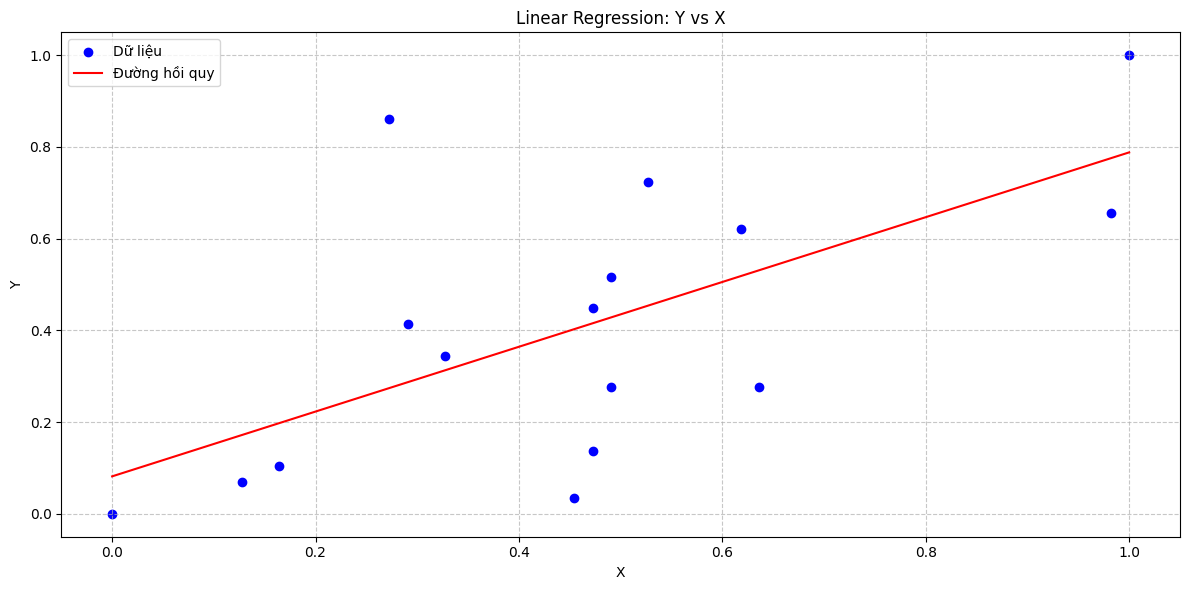

Phương trình hồi quy: Y = 0.0816 + 0.7065X


In [ ]:
import matplotlib.pyplot as plt
theta0 = theta[0]  # intercept
theta1 =theta[1]  # slope

# Tạo biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ điểm dữ liệu
plt.scatter(X_old, Y, color='blue', label='Dữ liệu')

# Vẽ đường hồi quy tuyến tính
x_line = np.linspace(0, 1, 100)
y_line = theta0 + theta1 * x_line
plt.plot(x_line, y_line, color='red', label='Đường hồi quy')

# Thêm tiêu đề và nhãn
plt.title('Linear Regression: Y vs X')
plt.xlabel('X')
plt.ylabel('Y')

# Thêm lưới
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# In phương trình hồi quy
print(f"Phương trình hồi quy: Y = {theta0:.4f} + {theta1:.4f}X")






In [ ]:
!unzip /content/Practice2_Chapter2.csv.zip

Archive:  /content/Practice2_Chapter2.csv.zip
  inflating: Practice2_Chapter2.csv  
  inflating: __MACOSX/._Practice2_Chapter2.csv  


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Practice2_Chapter2.csv')

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Tách biến Y và X
X = df[['TV', 'Radio', 'Newspaper']]  # Biến độc lập
Y = df['Sales']  # Biến phụ thuộc

print("X:\n", X)
print("Y:\n", Y)

X:
         TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
Y:
 0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [ ]:
X_old = df[['TV', 'Radio', 'Newspaper']]  # Biến độc lập


In [ ]:
X=min_max_scale(X)
print(X)
Y=min_max_scale(Y)
print(Y)

           TV     Radio  Newspaper
0    0.775786  0.762097   0.605981
1    0.148123  0.792339   0.394019
2    0.055800  0.925403   0.606860
3    0.509976  0.832661   0.511873
4    0.609063  0.217742   0.510994
..        ...       ...        ...
195  0.126818  0.074597   0.118734
196  0.316199  0.098790   0.068602
197  0.596212  0.187500   0.053650
198  0.956713  0.846774   0.579595
199  0.782550  0.173387   0.073879

[200 rows x 3 columns]
0      0.807087
1      0.346457
2      0.409449
3      0.586614
4      0.641732
         ...   
195    0.236220
196    0.488189
197    0.519685
198    0.940945
199    0.661417
Name: Sales, Length: 200, dtype: float64


In [ ]:
print(X.shape[1])

3


In [ ]:
theta=initialize_theta(n=3)
print(theta)

[1.76405235 0.40015721 0.97873798 2.2408932 ]


In [ ]:
X = X.values
m=X.shape[0]
ones=np.ones((m,1))
X=np.concatenate((ones,X),axis=1)
print(X)

[[1.         0.77578627 0.76209677 0.60598065]
 [1.         0.1481231  0.79233871 0.39401935]
 [1.         0.0557998  0.92540323 0.60686016]
 [1.         0.50997633 0.83266129 0.51187335]
 [1.         0.60906324 0.21774194 0.51099384]
 [1.         0.02705445 0.9858871  0.65699208]
 [1.         0.19208657 0.66129032 0.20404573]
 [1.         0.4041258  0.39516129 0.09938434]
 [1.         0.02671627 0.04233871 0.00615655]
 [1.         0.67331755 0.05241935 0.18381706]
 [1.         0.2211701  0.11693548 0.21020229]
 [1.         0.72370646 0.48387097 0.03254178]
 [1.         0.07811972 0.70766129 0.5769569 ]
 [1.         0.32735881 0.15322581 0.06068602]
 [1.         0.68785932 0.66330645 0.40193492]
 [1.         0.65843761 0.96169355 0.46262093]
 [1.         0.22691917 0.73790323 1.        ]
 [1.         0.94927291 0.7983871  0.48812665]
 [1.         0.2316537  0.41330645 0.15831135]
 [1.         0.49577274 0.48185484 0.16534741]
 [1.         0.73621914 0.55846774 0.46701847]
 [1.         

In [ ]:
learning_rate = 0.01
num_iterations = 1000
epsilon = 1e-6  # Điều kiện dừng sớm (ngưỡng thay đổi chi phí)


# Vòng lặp huấn luyện với dừng sớm
previous_cost = float('inf')  # Khởi tạo chi phí trước với giá trị vô hạn

for i in range(num_iterations):
    y_hat = predict(X, theta)  # Dự đoán
    cost_value = cost(Y, y_hat, m)  # Tính chi phí
    grad = gradient(Y, y_hat, X, m)  # Tính gradient
    theta = theta - learning_rate * grad  # Cập nhật theta

    # In chi phí sau mỗi 10 vòng lặp
    if i % 10 == 0:
        print(f"Iteration {i+1}: Cost = {cost_value}")

    # Kiểm tra điều kiện dừng sớm
    if abs(previous_cost - cost_value) < epsilon:
        print(f"Early stopping at iteration {i+1}, Cost = {cost_value}")
        break

    previous_cost = cost_value  # Cập nhật chi phí trước cho vòng lặp tiếp theo

print("Theta (parameters):", theta)

Iteration 1: Cost = 0.22641867583493125
Iteration 11: Cost = 0.18864786019986504
Iteration 21: Cost = 0.16086721400352116
Iteration 31: Cost = 0.14036964000832938
Iteration 41: Cost = 0.12518249332028233
Iteration 51: Cost = 0.1138683064132799
Iteration 61: Cost = 0.10537958256755854
Iteration 71: Cost = 0.09895298757062407
Iteration 81: Cost = 0.09403224991866047
Iteration 91: Cost = 0.09021198016384682
Iteration 101: Cost = 0.0871967335053077
Iteration 111: Cost = 0.08477117973973516
Iteration 121: Cost = 0.08277836685944376
Iteration 131: Cost = 0.08110388228328255
Iteration 141: Cost = 0.07966431154107817
Iteration 151: Cost = 0.07839882840210075
Iteration 161: Cost = 0.0772630668064182
Iteration 171: Cost = 0.07622465548750197
Iteration 181: Cost = 0.07525996415535857
Iteration 191: Cost = 0.0743517325128312
Iteration 201: Cost = 0.07348734256990123
Iteration 211: Cost = 0.07265755971287145
Iteration 221: Cost = 0.0718556153433475
Iteration 231: Cost = 0.07107653841051763
Iteratio

In [ ]:
print(theta)

[ 1.25203825e-01  1.65596423e-01 -1.93580823e-04  1.23810215e+00]


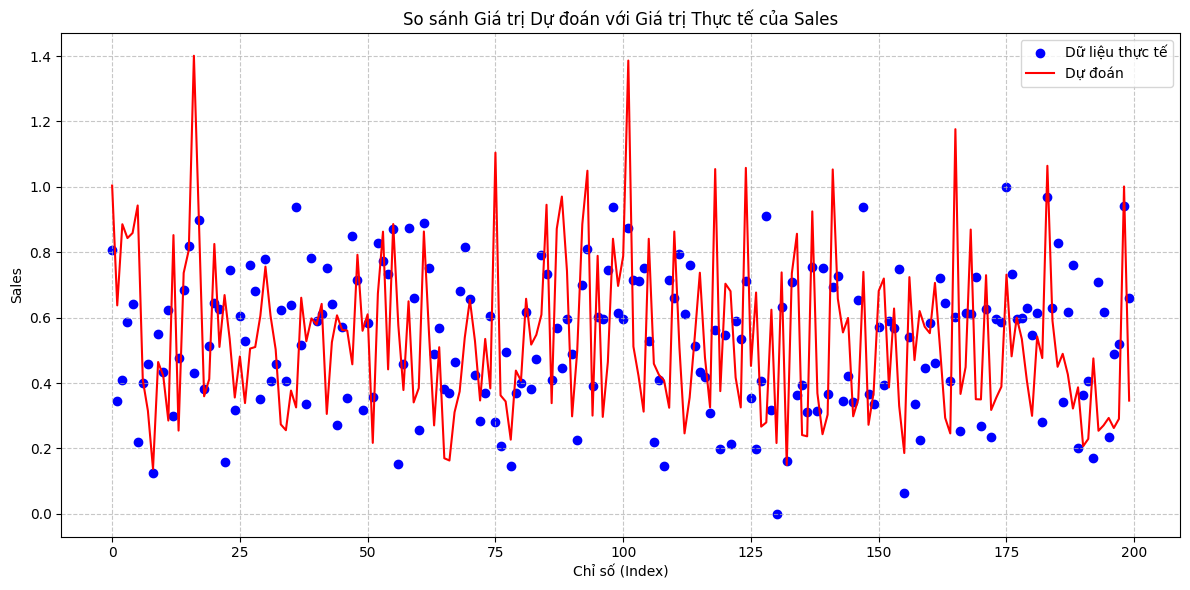

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử bạn đã có X, Y và theta
# Tính y_hat (dự đoán) từ tất cả các biến độc lập
y_hat = np.dot(X, theta)

# Tạo biểu đồ so sánh giá trị Sales thực tế và dự đoán
plt.figure(figsize=(12, 6))

# Vẽ điểm dữ liệu thực tế
plt.scatter(np.arange(len(Y)), Y, color='blue', label='Dữ liệu thực tế')

# Vẽ đường dự đoán
plt.plot(np.arange(len(y_hat)), y_hat, color='red', label='Dự đoán')

# Thêm tiêu đề và nhãn
plt.title('So sánh Giá trị Dự đoán với Giá trị Thực tế của Sales')
plt.xlabel('Chỉ số (Index)')
plt.ylabel('Sales')

# Thêm lưới
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

